In [11]:
import pandas as pd

ad = pd.read_csv("Advertising.csv")
df = ad.copy()
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [12]:
df = df.iloc[:,1:len(df)] # index'i değişken olarak aldığı için,bu hatadan kurtulma
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.4 KB


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [16]:
df.isnull().values.any()

False

In [17]:
df.corr() # aralalındaki ilişki

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


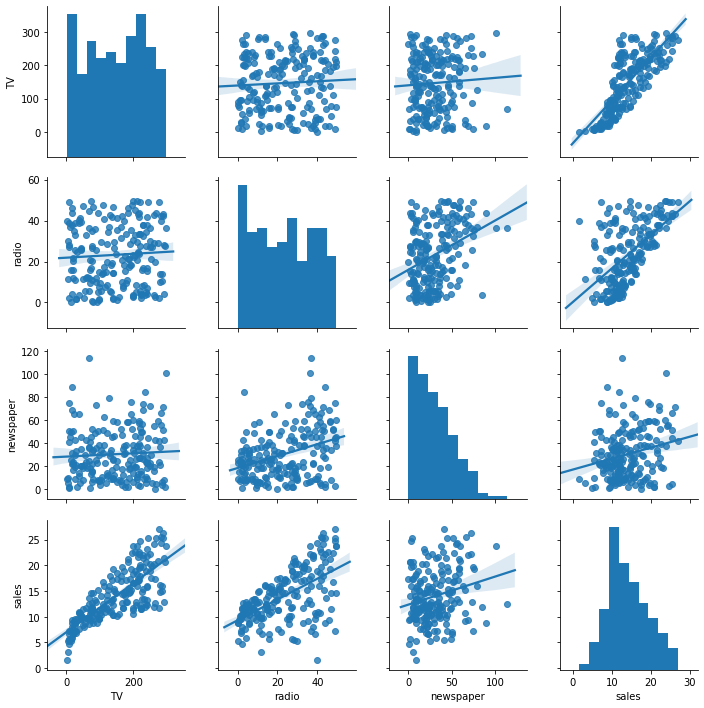

In [20]:
import seaborn as sns
sns.pairplot(df, kind = "reg");

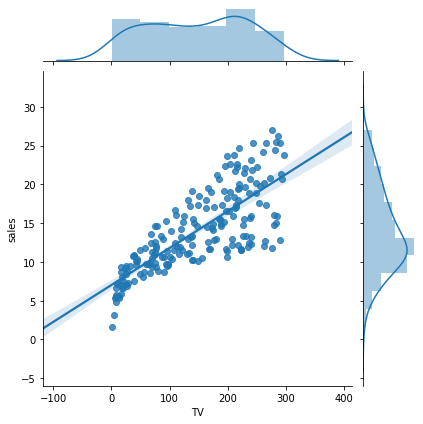

In [22]:
sns.jointplot(x="TV",y="sales",data=df,kind="reg");

Statsmodels ile Modelleme

In [27]:
import statsmodels.api as sm

In [28]:
X = df[["TV"]]
X[0:5]

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [29]:
X = sm.add_constant(X)

/Users/kerem/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [30]:
X[0:5]

,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [32]:
y = df["sales"]
y[0:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [35]:
lm = sm.OLS(y,X) #model kurma
model = lm.fit() # modeli fit ettik
model.summary() # modelin çıktılarına erişme

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 03 Sep 2022   Prob (F-statistic):           1.47e-42
Time:                        18:35:30   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
import statsmodels.formula.api as smf

In [37]:
lm = smf.ols("sales ~ TV ",df) #üstteki modelin aynısı (başka bir yol)
model = lm.fit()
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sat, 03 Sep 2022   Prob (F-statistic):           1.47e-42
Time:                        18:46:33   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
model.params #b0,b1

Intercept    7.032594
TV           0.047537
dtype: float64

In [39]:
model.summary().tables[1] #kat sayılarla ilişkin değerler

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [40]:
model.conf_int() # kat sayıların güven aralıkları

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [41]:
model.f_pvalue #modelin anlamlılığına ilişkin değer

1.4673897001947095e-42

In [42]:
print("f_pvalue :","%.3f"%model.f_pvalue)

f_pvalue : 0.000


In [43]:
print("fvalue :","%.3f"%model.fvalue)

fvalue : 312.145


In [44]:
print("tvalue :","%.3f"%model.tvalues[0:1]) #parametre anlalılığına ilişkin değer

tvalue : 15.360


In [45]:
model.mse_model #hata karaler ortalaması

3314.6181668686486

In [46]:
model.rsquared

0.611875050850071

In [47]:
model.rsquared_adj

0.6099148238341623

In [48]:
model.fittedvalues[0:5] #tahmin edilen değerler

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64

In [49]:
y[0:5] # gerçek değerler

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [50]:
#MODEL DENKLEMİ
print("Sales = " + str("%.2f" % model.params[0]) + " + TV " + "*" + str("%.2f") % model.params[1])

Sales = 7.03 + TV *0.05


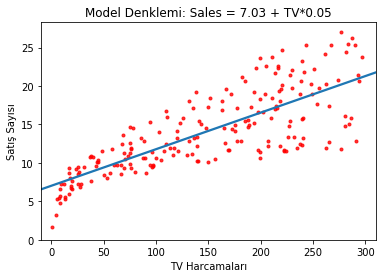

In [51]:
# Modelin Görselleştirilmesi
import matplotlib.pyplot as plt
g = sns.regplot(df["TV"],df["sales"],ci=None,scatter_kws={"color" : "r","s":9})
g.set_title("Model Denklemi: Sales = 7.03 + TV*0.05")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
plt.xlim(-10,310)
plt.ylim(bottom=0);

In [52]:
from sklearn.linear_model import LinearRegression

In [54]:
# Model kurma (başka yöntem)
X = df[["TV"]]
y = df[["sales"]]
reg = LinearRegression()
model = reg.fit(X,y)

In [55]:
model.intercept_ #b0

array([7.03259355])

In [56]:
model.coef_ #b1

array([[0.04753664]])

In [57]:
model.score(X,y) #r-sq değeri

0.611875050850071

In [58]:
model.predict(X)[0:10] # tahnin edilen değerler

array([[17.97077451],
       [ 9.14797405],
       [ 7.85022376],
       [14.23439457],
       [15.62721814],
       [ 7.44616232],
       [ 9.76595037],
       [12.74649773],
       [ 7.44140866],
       [16.53041431]])

Tahmin

In [59]:
X = df[["TV"]]
y = df[["sales"]]
reg = LinearRegression()
model = reg.fit(X,y)

In [60]:
model.predict([[30]]) #denkleme sokar

array([[8.45869276]])

In [61]:
yeni_veri = [[5],[90],[200]]

In [62]:
model.predict(yeni_veri)

array([[ 7.27027675],
       [11.31089119],
       [16.53992164]])